In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

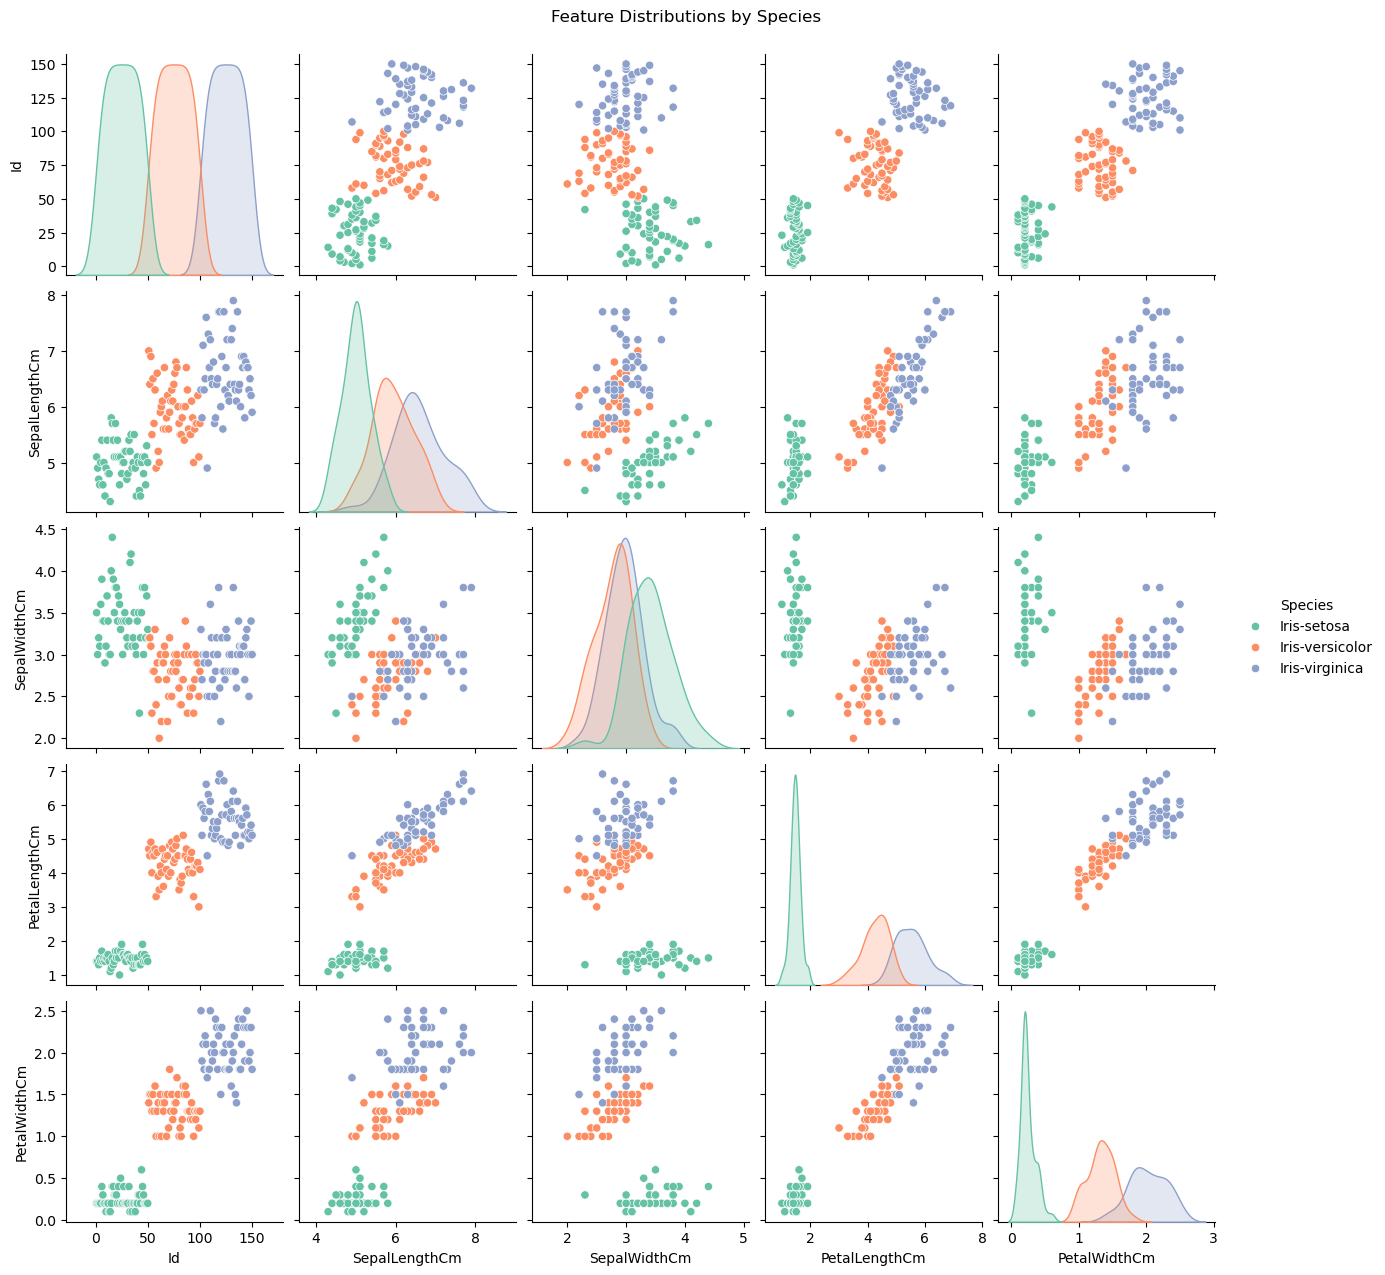

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(df, hue='Species', palette='Set2')
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.show()


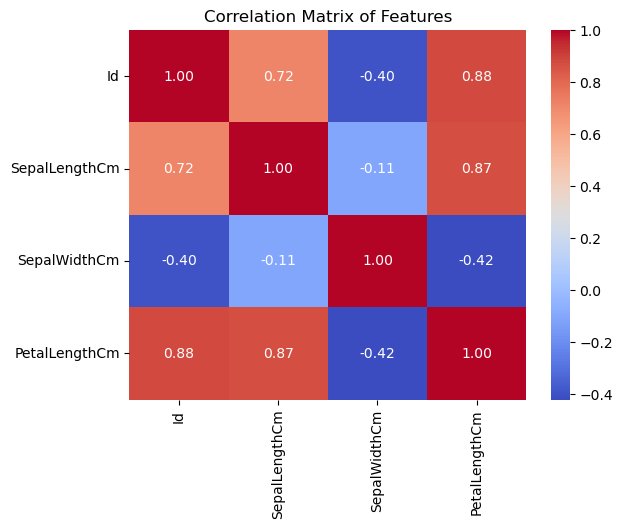

''

In [10]:
corr = df.iloc[:, :4].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()
""

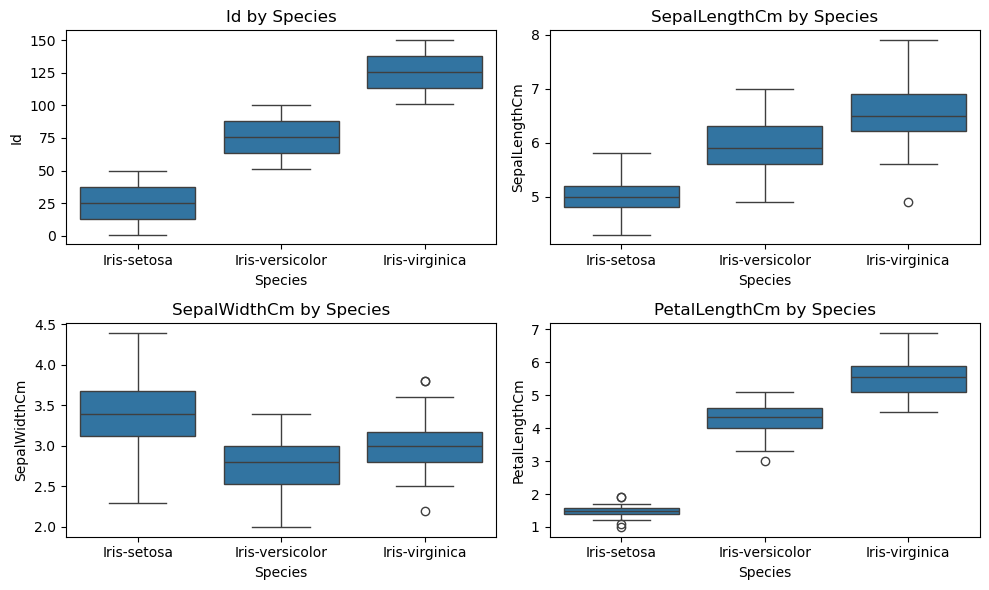

In [15]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(df.columns[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=column, data=df)
    plt.title(f'{column} by Species')
plt.tight_layout()
plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['Species'])  # 0, 1, 2


In [52]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species','target','Id'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance



In [54]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

In [55]:
xgb = XGBClassifier( eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("🌳 Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


🌳 Gradient Boosting:
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [57]:
print("🚀 XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


🚀 XGBoost:
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



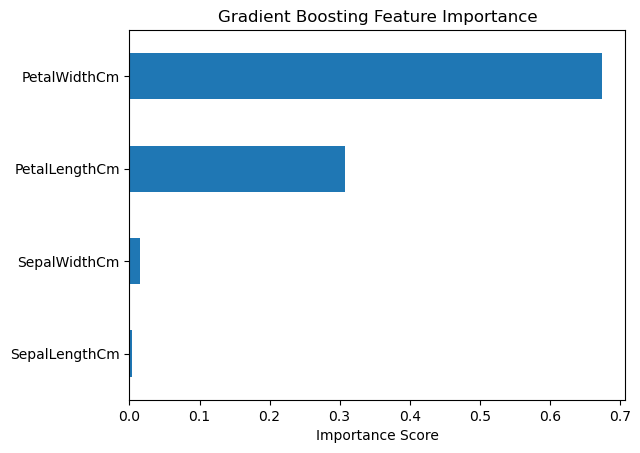

In [58]:
feat_imp_gb = pd.Series(gb.feature_importances_, index=X.columns).sort_values()
feat_imp_gb.plot(kind='barh', title='Gradient Boosting Feature Importance')
plt.xlabel("Importance Score")
plt.show()


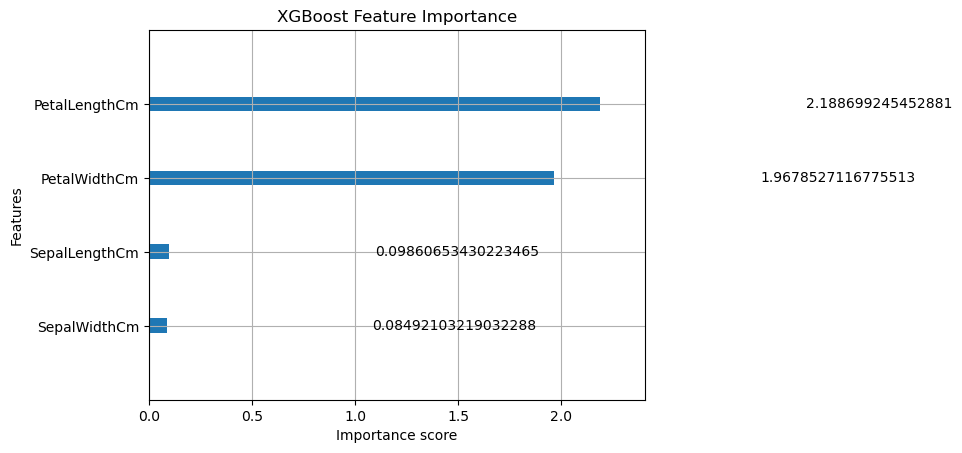

In [59]:
plot_importance(xgb, importance_type='gain')
plt.title('XGBoost Feature Importance')
plt.show()


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5]
}


xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)


In [61]:
grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("📈 Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
✅ Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
📈 Best Score: 0.9666666666666668


In [62]:
from sklearn.metrics import classification_report, accuracy_score

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("🎯 Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


🎯 Test Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

